<a href="https://colab.research.google.com/github/priyanu17/hot_leads/blob/master/Advanced_Lead_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
import warnings
warnings.filterwarnings("ignore")

In [390]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [391]:
# load data:

lead_data = pd.read_csv("Leads.csv")
lead_data_dictionary = pd.read_excel("Leads Data Dictionary.xlsx" )

In [392]:
lead_data_dictionary.columns.to_list()

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']

In [393]:
lead_data_dictionary.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identified.
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."


In [394]:
lead_data_dictionary = lead_data_dictionary.dropna(how = "all") # drop first empty row
lead_data_dictionary = lead_data_dictionary.drop(columns = ["Unnamed: 0"]) # drop first empty column
new_header = lead_data_dictionary.iloc[0] # extract first row to make as header
lead_data_dictionary = lead_data_dictionary[1:] # all rows except first 
lead_data_dictionary.columns = new_header # assign new header to dataframe
lead_data_dictionary = lead_data_dictionary.reset_index() # reset_index
lead_data_dictionary = lead_data_dictionary.drop(columns = ["index"]) # remove index column

pd.options.display.max_colwidth = 200  # set display width 
lead_data_dictionary

1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [395]:
# lead_data

In [396]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [397]:
lead_data.shape

(9240, 37)

In [398]:
# data has 9240 rows and 37 columns
# Target Variable : "Converted"

In [399]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [400]:
# info on dataset
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [401]:
# number of unique values for each category
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [402]:
# check for duplicate entries in the dataset
lead_data.duplicated(keep = "first").value_counts()

False    9240
dtype: int64

In [403]:
# no duplicate values are present

In [404]:
# find and remove constant features

lead_data.nunique()[lead_data.nunique() == 1]

Magazine                                    1
Receive More Updates About Our Courses      1
Update me on Supply Chain Content           1
Get updates on DM Content                   1
I agree to pay the amount through cheque    1
dtype: int64

In [405]:
constant_feature_columns = lead_data.nunique()[lead_data.nunique() == 1].index.to_list()
constant_feature_columns

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [406]:
# view constant feature uniques

for column in constant_feature_columns:
  print("Column is : " + column)
  print(lead_data[column].value_counts())
  print("\n")

Column is : Magazine
No    9240
Name: Magazine, dtype: int64


Column is : Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64


Column is : Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64


Column is : Get updates on DM Content
No    9240
Name: Get updates on DM Content, dtype: int64


Column is : I agree to pay the amount through cheque
No    9240
Name: I agree to pay the amount through cheque, dtype: int64




In [407]:
# drop constant features
lead_data = lead_data.drop(columns = constant_feature_columns)

In [408]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [409]:
lead_data.columns.size

32

In [410]:
# drop "Prospect ID" and "Lead Number" as it will not contribute to analysis:

lead_data = lead_data.drop(columns = ["Prospect ID", "Lead Number"])

In [411]:
lead_data.columns.size

30

In [412]:
(lead_data["TotalVisits"]).dtype

dtype('float64')

In [413]:
# value_counts()

for column in lead_data.columns[:10]:
  print("Column is : " + column)
  print("Dtype is : " + str((lead_data[column]).dtype))
  print("value_counts : ")
  print(lead_data[column].value_counts(dropna = False))
  print("\n")

Column is : Lead Origin
Dtype is : object
value_counts : 
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Column is : Lead Source
Dtype is : object
value_counts : 
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
testone                 1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64


Column is : Do Not Email
Dtype is : object
value_counts : 
No     8506
Yes     734
N

In [414]:
# changes made to "Lead Source"
lead_data["Lead Source"].replace(["google", "welearnblog_Home", "WeLearn"], 
                            ["Google", "blog", "blog"],
                            inplace = True)

In [415]:
lead_data["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
blog                    3
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [416]:
lead_source_less = lead_data["Lead Source"].value_counts()[lead_data["Lead Source"].value_counts() < 10].index.to_list()
lead_source_less

['bing',
 'Click2call',
 'blog',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'Pay per Click Ads',
 'NC_EDM',
 'testone',
 'youtubechannel']

In [417]:
# categories < 10 are shifted to "Others" column
lead_data["Lead Source"].replace(lead_source_less, "Others", inplace = True)

In [418]:
lead_data["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [419]:
# changes made to "Last Activity"
lead_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [420]:
# values < 10 chifted to "Others"

last_activity_less = lead_data["Last Activity"].value_counts()[lead_data["Last Activity"].value_counts() < 10].index.to_list()
last_activity_less

['Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [421]:
# categories < 10 are shifted to "Others" column
lead_data["Last Activity"].replace(last_activity_less, "Others", inplace = True)

In [422]:
lead_data["Last Activity"].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [423]:
# changes made to "Country"
lead_data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
South Africa               4
Nigeria                    4
Sweden                     3
China                      2
Belgium                    2
Bangladesh                 2
Philippines                2
Italy                      2
Ghana                      2
Uganda                     2
Netherlands                2
Asia/Pacific Region        2
Tanzania                   1
Malaysia                   1
Liberia                    1
Kenya                      1
Indonesia                  1
Russia                     1
Switzerland   

In [424]:
country_less = lead_data["Country"].value_counts()[lead_data["Country"].value_counts() <= 10].index.to_list()
country_less

['Qatar',
 'Hong Kong',
 'Bahrain',
 'France',
 'Oman',
 'unknown',
 'Kuwait',
 'Germany',
 'Canada',
 'South Africa',
 'Nigeria',
 'Sweden',
 'China',
 'Belgium',
 'Bangladesh',
 'Philippines',
 'Italy',
 'Ghana',
 'Uganda',
 'Netherlands',
 'Asia/Pacific Region',
 'Tanzania',
 'Malaysia',
 'Liberia',
 'Kenya',
 'Indonesia',
 'Russia',
 'Switzerland',
 'Sri Lanka',
 'Vietnam',
 'Denmark']

In [425]:
lead_data.replace(country_less, "Others", inplace = True)

In [426]:
lead_data["Country"].value_counts()

India                   6492
Others                    92
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Name: Country, dtype: int64

In [427]:
# value_counts()

for column in lead_data.columns[10:20]:
  print("Column is : " + column)
  print("Dtype is : " + str((lead_data[column]).dtype))
  print(lead_data[column].value_counts(dropna = False))
  print("\n")

Column is : Specialization
Dtype is : object
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


Column is : How did you hear about X Education
Dtype is : object
Select       

In [428]:
# value_counts()

for column in lead_data.columns[20:]:
  print("Column is : " + column)
  print("Dtype is : " + str((lead_data[column]).dtype))
  print(lead_data[column].value_counts(dropna = False))
  print("\n")

Column is : Tags
Dtype is : object
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                  

In [429]:
# "What matters most to you in choosing a course"

lead_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [430]:
lead_data["What matters most to you in choosing a course"].replace(["Flexibility & Convenience", "Other"], "Others", inplace = True)

In [431]:
lead_data[ "What matters most to you in choosing a course"].value_counts()

Better Career Prospects    6528
Others                        3
Name: What matters most to you in choosing a course, dtype: int64

In [432]:
# changes made to "Tags" column
lead_data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [433]:
# categories < 20 can be shifted to others column

tags_less = lead_data["Tags"].value_counts()[lead_data["Tags"].value_counts() < 20].index.to_list()
tags_less

['in touch with EINS',
 'Lost to Others',
 'Want to take admission but has financial problems',
 'Still Thinking',
 'Interested in Next batch',
 'In confusion whether part time or DLP',
 'Lateral student',
 'University not recognized',
 'Shall take in the next coming month',
 'Recognition issue (DEC approval)']

In [434]:
# replace with "Others"
lead_data["Tags"].replace(tags_less, "Others", inplace = True)

In [435]:
lead_data["Tags"].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Others                                   49
wrong number given                       47
opp hangup                               33
number not provided                      27
Name: Tags, dtype: int64

In [436]:
# changes made to "Last Notable Activity"

lead_data["Last Notable Activity"].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [437]:
last_notable_activity_less = lead_data["Last Notable Activity"].value_counts()[lead_data["Last Notable Activity"].value_counts(dropna = False) < 15].index.to_list()
last_notable_activity_less

['Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Email Received',
 'Resubscribed to emails',
 'Form Submitted on Website',
 'View in browser link Clicked']

In [438]:
lead_data["Last Notable Activity"].replace(last_notable_activity_less, "Others", inplace = True)

In [439]:
lead_data["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: Last Notable Activity, dtype: int64

In [440]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [441]:
# Dealing with "NANs"

In [442]:
# replace "Select" with "nan" value (mentioned in problem statement)
lead_data = lead_data.replace(['Select'], np.nan)


In [443]:
# check for null data
lead_data.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [444]:
# null percentages
((lead_data.isna().sum()/len(lead_data))*100).round(2) 

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [445]:
# columns with > 45% null values

high_null_columns = ((lead_data.isna().sum()/len(lead_data))*100).round(2)[((lead_data.isna().sum()/len(lead_data))*100).round(2) > 45].index.to_list()
high_null_columns

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [446]:
# drop above columns:
lead_data = lead_data.drop(columns = high_null_columns)

In [447]:
((lead_data.isna().sum()/len(lead_data))*100).round(2) 

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [448]:
# columns with < 2% null values
low_null_columns = ((lead_data.isna().sum()/len(lead_data))*100).round(2)[((lead_data.isna().sum()/len(lead_data))*100).round(2) < 2][((lead_data.isna().sum()/len(lead_data))*100).round(2) > 0].index.to_list()
low_null_columns

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

In [449]:
# drop rows for columns with low null percenatages
lead_data = lead_data.dropna(axis = 0, subset=low_null_columns)

In [450]:
((lead_data.isna().sum()/len(lead_data))*100).round(2) 

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.30
Specialization                                   36.17
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [451]:
# handling null data

In [452]:
null_value_columns = lead_data.columns[lead_data.isna().any()].tolist()
null_value_columns

['Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

In [453]:
lead_data["Country"].value_counts(dropna = False)

India                   6491
NaN                     2296
Others                    92
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Name: Country, dtype: int64

In [454]:
# fill nan countries with "India" (mode of the column)
lead_data = lead_data.fillna({"Country" : "India"})

In [455]:
# "unknown" can be shifted into "Others"
lead_data["Country"].replace(["unknown"], "Others", inplace = True)

In [456]:
lead_data["Country"].value_counts()

India                   8787
Others                    92
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Name: Country, dtype: int64

In [457]:
lead_data["Specialization"].value_counts(dropna = False)

NaN                                  3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [458]:
lead_data = lead_data.fillna({"Specialization" : "Others"})

In [459]:
lead_data["Specialization"].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [460]:
lead_data["What is your current occupation"].value_counts(dropna = False)

Unemployed              5476
NaN                     2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [461]:
# fill nan with "Others"
lead_data = lead_data.fillna({"What is your current occupation" : "Others"})
lead_data["What is your current occupation"].replace(["Other"], "Others", inplace = True)

In [462]:
lead_data["What is your current occupation"].value_counts()

Unemployed              5476
Others                  2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [463]:
lead_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects    6370
Others                        2
Name: What matters most to you in choosing a course, dtype: int64

In [464]:
# fill nan with "Others"
lead_data = lead_data.fillna({"What matters most to you in choosing a course" : "Others"})
lead_data["What matters most to you in choosing a course"].replace(["Other"], "Others", inplace = True)

In [465]:
lead_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects    6370
Others                     2704
Name: What matters most to you in choosing a course, dtype: int64

In [466]:
lead_data["Tags"].value_counts()

Will revert after reading the email    2016
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Others                                   49
wrong number given                       47
opp hangup                               33
number not provided                      25
Name: Tags, dtype: int64

In [467]:
lead_data["Tags"].fillna(method = 'ffill', inplace = True)

In [468]:
lead_data["Tags"].value_counts()

Will revert after reading the email    3205
Ringing                                1862
Interested in other courses             814
Already a student                       700
Closed by Horizzon                      468
switched off                            388
Busy                                    311
Lost to EINS                            265
Not doing further education             246
Interested  in full time MBA            190
Graduation in progress                  172
invalid number                          129
Diploma holder (Not Eligible)            93
wrong number given                       76
Others                                   70
opp hangup                               46
number not provided                      39
Name: Tags, dtype: int64

In [469]:
lead_data["City"].value_counts(dropna = False)

NaN                            3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [470]:
lead_data = lead_data.fillna({"City" : "Mumbai"})

In [471]:
lead_data["City"].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [472]:
lead_data.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                           

In [473]:
lead_data.columns.size

23

In [474]:
# no null data is present in the dataset

In [475]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [476]:
lead_data_copy = lead_data.copy()
lead_data_copy = lead_data_copy.drop(columns = ["Specialization","Tags", "TotalVisits", "Total Time Spent on Website", 
                                                "Page Views Per Visit", "Do Not Call", "Do Not Email", "City", "Country",
                                                "Last Notable Activity"])


In [477]:
lead_data_copy.nunique()

Lead Origin                                       4
Lead Source                                       9
Converted                                         2
Last Activity                                    12
What is your current occupation                   6
What matters most to you in choosing a course     2
Search                                            2
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
A free copy of Mastering The Interview            2
dtype: int64

In [478]:
cols_at_end = ["Converted"]
lead_data_copy = lead_data_copy[[c for c in lead_data_copy if c not in cols_at_end] 
        + [c for c in cols_at_end if c in lead_data_copy]]

In [479]:
# cross tabulation data

tabular_data = pd.concat([pd.crosstab( index = lead_data_copy[x] 
                                      , columns = lead_data_copy["Converted"]) for x in lead_data_copy.columns[:-1]],
                          keys = lead_data_copy.columns[:-1])

In [480]:
tabular_data

Converted                                                                   0     1
Lead Origin                                   API                        2463  1115
                                              Landing Page Submission    3118  1767
                                              Lead Add Form                37   544
                                              Lead Import                  21     9
Lead Source                                   Direct Traffic             1725   818
                                              Facebook                     22     9
                                              Google                     1726  1147
                                              Olark Chat                 1305   448
                                              Organic Search              718   436
                                              Others                       14     9
                                              Reference                    33   410
                                              Referral Sites               94    31
                                              Welingak Website              2   127
Last Activity                                 Converted to Lead           374    54
                                              Email Bounced               296    16
                                              Email Link Clicked          194    73
                                              Email Opened               2182  1250
                                              Form Submitted on Website    88    28
                                              Had a Phone Conversation      5    20
                                              Olark Chat Conversation     888    84
                                              Others                        6    11
                                              Page Visited on Website     489   151
                                              SMS Sent                   1011  1705
                                              Unreachable                  61    29
                                              Unsubscribed                 45    14
What is your current occupation               Businessman                   3     5
                                              Housewife                     0     9
                                              Others                     2319   379
                                              Student                     132    74
                                              Unemployed                 3130  2346
                                              Working Professional         55   622
What matters most to you in choosing a course Better Career Prospects    3306  3064
                                              Others                     2333   371
Search                                        No                         5630  3430
                                              Yes                           9     5
Newspaper Article                             No                         5638  3434
                                              Yes                           1     1
X Education Forums                            No                         5638  3435
                                              Yes                           1     0
Newspaper                                     No                         5638  3435
                                              Yes                           1     0
Digital Advertisement                         No                         5636  3434
                                              Yes                           3     1
Through Recommendations                       No                         5637  3430
                                              Yes                           2     5
A free copy of Mastering The Interview        No                         3781  2405
                                              Yes   

In [481]:
tabular_data["conversion_percentage"] = ((tabular_data[1] / (tabular_data[0] + tabular_data[1]))*100).round(2)


In [482]:
tabular_data

Converted                                                                   0  ...  conversion_percentage
Lead Origin                                   API                        2463  ...                  31.16
                                              Landing Page Submission    3118  ...                  36.17
                                              Lead Add Form                37  ...                  93.63
                                              Lead Import                  21  ...                  30.00
Lead Source                                   Direct Traffic             1725  ...                  32.17
                                              Facebook                     22  ...                  29.03
                                              Google                     1726  ...                  39.92
                                              Olark Chat                 1305  ...                  25.56
                                              Organic Search              718  ...                  37.78
                                              Others                       14  ...                  39.13
                                              Reference                    33  ...                  92.55
                                              Referral Sites               94  ...                  24.80
                                              Welingak Website              2  ...                  98.45
Last Activity                                 Converted to Lead           374  ...                  12.62
                                              Email Bounced               296  ...                   5.13
                                              Email Link Clicked          194  ...                  27.34
                                              Email Opened               2182  ...                  36.42
                                              Form Submitted on Website    88  ...                  24.14
                                              Had a Phone Conversation      5  ...                  80.00
                                              Olark Chat Conversation     888  ...                   8.64
                                              Others                        6  ...                  64.71
                                              Page Visited on Website     489  ...                  23.59
                                              SMS Sent                   1011  ...                  62.78
                                              Unreachable                  61  ...                  32.22
                                              Unsubscribed                 45  ...                  23.73
What is your current occupation               Businessman                   3  ...                  62.50
                                              Housewife                     0  ...                 100.00
                                              Others                     2319  ...                  14.05
                                              Student                     132  ...                  35.92
                                              Unemployed                 3130  ...                  42.84
                                              Working Professional         55  ...                  91.88
What matters most to you in choosing a course Better Career Prospects    3306  ...                  48.10
                                              Others                     2333  ...                  13.72
Search                                        No                         5630  ...                  37.86
                                              Yes                           9  ...                  35.71
Newspaper Article                             No                         5638  ...                  37.85
                                              Yes                           1 

#### Observations from above cross_tab data

1) "Lead Add Form" in "Lead Origin" has high conversion rate

2) "Reference" , "Welingak Website" in "Lead Source" has high conversion rate

3) "Has a Phone Conversation" and "SMS Sent" in "Last Activity" has high conversion rate

4) "Businessman", "HouseWife" and "Working Professional" have high conversion rates in "What is your current occupation" column

5) In "What matters most to you in choosing a course", "Better Career Prospects" has convertion rate of 48%

In [483]:
# Visualizations

In [484]:
sns.set(style = "darkgrid")

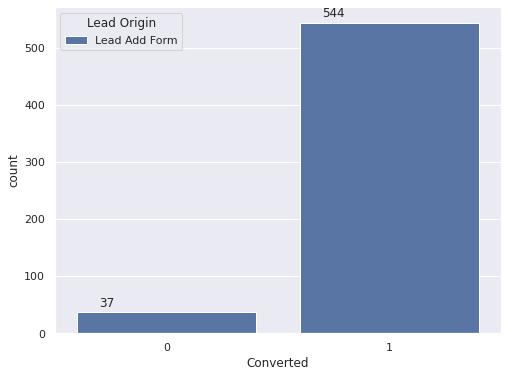

In [485]:
# Lead Origin
plt.figure( figsize = (8, 6))
ax = sns.countplot(x="Converted", hue="Lead Origin", data=lead_data[lead_data["Lead Origin"] == "Lead Add Form"])

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

In [486]:
# "Lead Add Form" has more conversions than non conversions

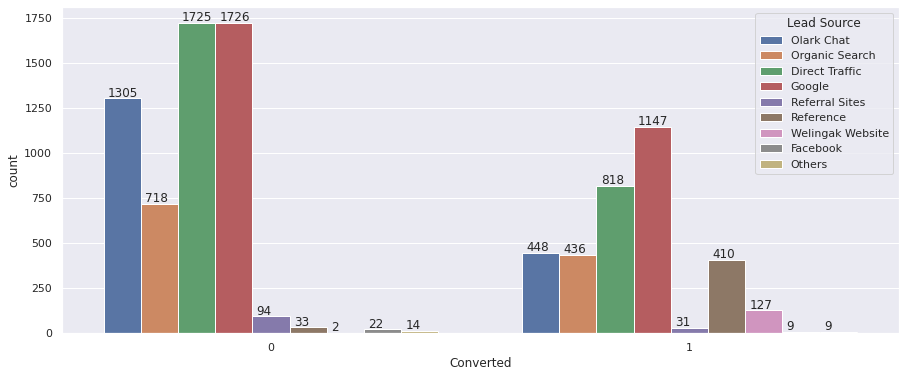

In [487]:
# Lead Source
plt.figure( figsize = (15, 6))
ax = sns.countplot(x="Converted", hue="Lead Source", data=lead_data)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

In [488]:
# "Lead Source" as "Reference" has high conversion ratio

In [489]:
# concat only "Had a Phone Conversation" and "SMS Sent" data from "Last Activity"

lead_last_activity_data = pd.concat([lead_data[lead_data["Last Activity"] == "Had a Phone Conversation"].copy(),
                                    lead_data[lead_data["Last Activity"] == "SMS Sent"].copy()])

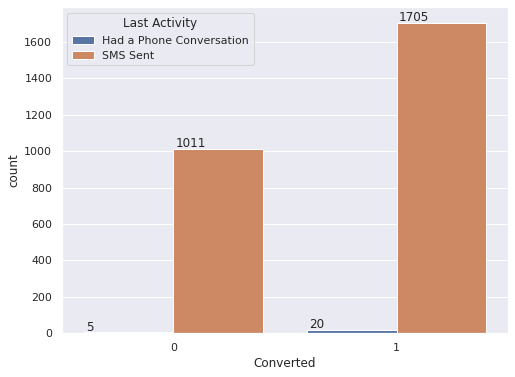

In [490]:
# Last Activity
plt.figure( figsize = (8, 6))
ax = sns.countplot(x="Converted", hue="Last Activity", data=lead_last_activity_data)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

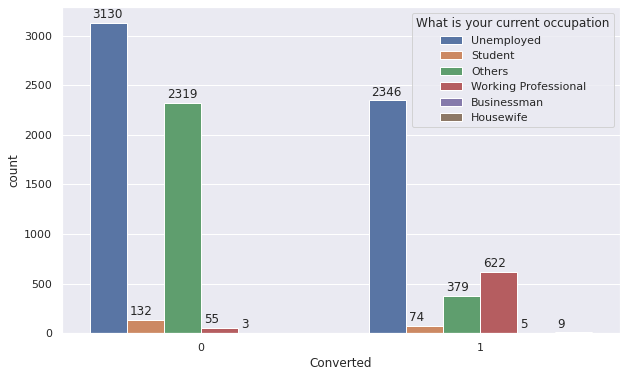

In [491]:
# What is your current occupation

plt.figure( figsize = (10, 6))
ax = sns.countplot(x="Converted", hue="What is your current occupation", data=lead_data)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))

In [492]:
# "Working Professionals" convertion ratio is high

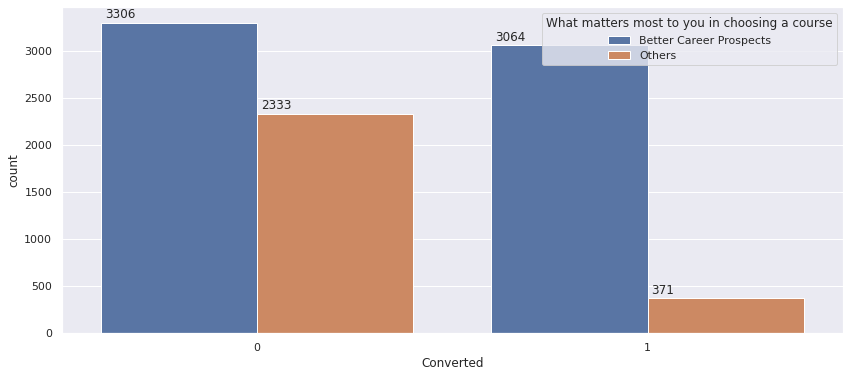

In [493]:
# What matters most to you in choosing a course

plt.figure( figsize = (14, 6))
ax = sns.countplot(x="Converted", hue="What matters most to you in choosing a course", data=lead_data)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))

In [494]:
# 48% conversion rate for "Better Career Prospects"

In [495]:
pd.crosstab(index = lead_data["Tags"], columns = lead_data["Converted"])

Converted,0,1
Tags,,
Already a student,636,64
Busy,170,141
Closed by Horizzon,114,354
Diploma holder (Not Eligible),84,9
Graduation in progress,150,22
Interested in full time MBA,166,24
Interested in other courses,727,87
Lost to EINS,73,192
Not doing further education,220,26


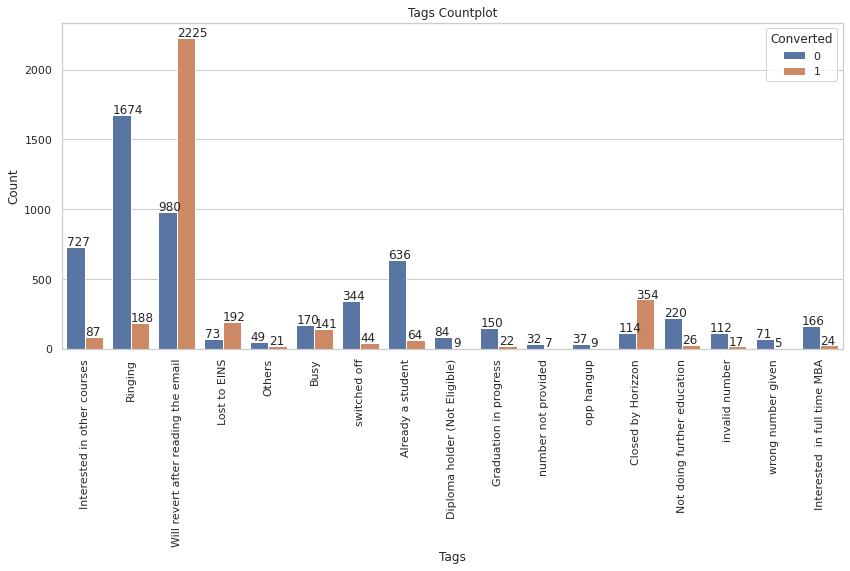

In [496]:
# Tags

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (14, 6))
ax = sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.title("Tags Countplot")
plt.xlabel("Tags")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

In [497]:
# "Closed by Horizzon", "Will revert after reading the email" has high conversion ratio in "Tags" column

In [498]:
# Other Visualizations

In [499]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

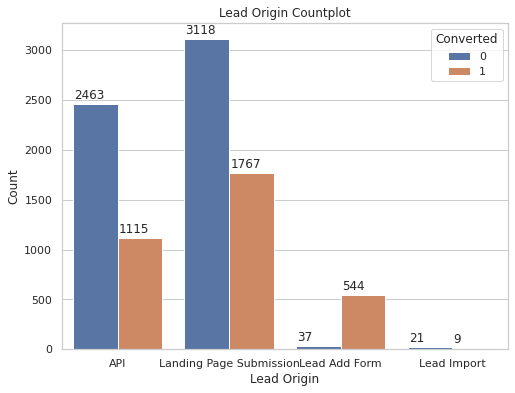

In [500]:
# "Lead Origin"

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.title("Lead Origin Countplot")
plt.xlabel("Lead Origin")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))

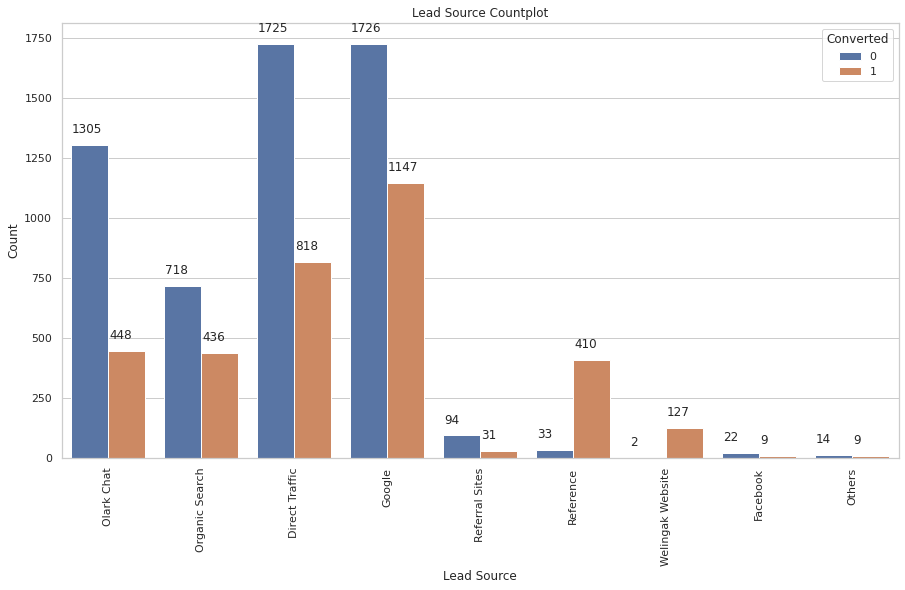

In [501]:
# "Lead Source"

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (15, 8))
ax = sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.title("Lead Source Countplot")
plt.xlabel("Lead Source")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))

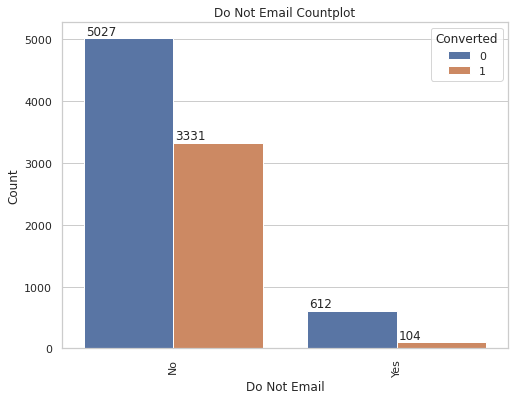

In [502]:
# "Do Not Email"

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.title("Do Not Email Countplot")
plt.xlabel("Do Not Email")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))

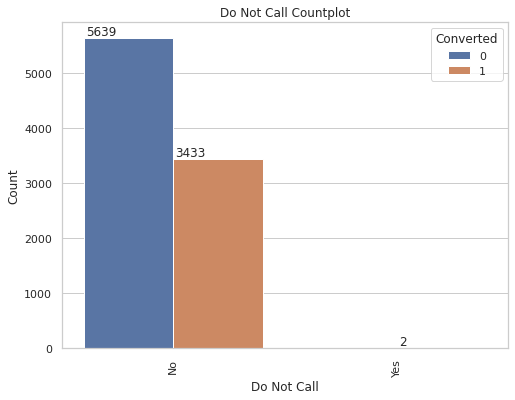

In [503]:
# "Do Not Call"

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.title("Do Not Call Countplot")
plt.xlabel("Do Not Call")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))

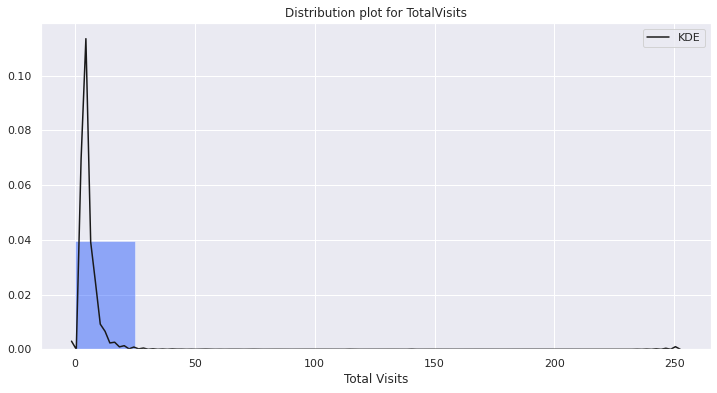

In [504]:
# TotalVisits
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(lead_data["TotalVisits"], kde=True, bins = 10, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.title("Distribution plot for TotalVisits")
plt.xlabel("Total Visits")
plt.show()

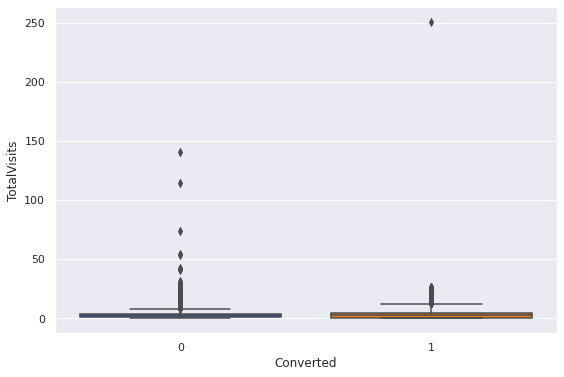

In [505]:
plt.figure(figsize = (9, 6))
ax = sns.boxplot(y = "TotalVisits", x = "Converted", data = lead_data)
plt.show()

In [506]:
# remove outliers

bound = lead_data['TotalVisits'].quantile([0.02,0.98]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= bound[0]] = bound[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= bound[1]] = bound[1]

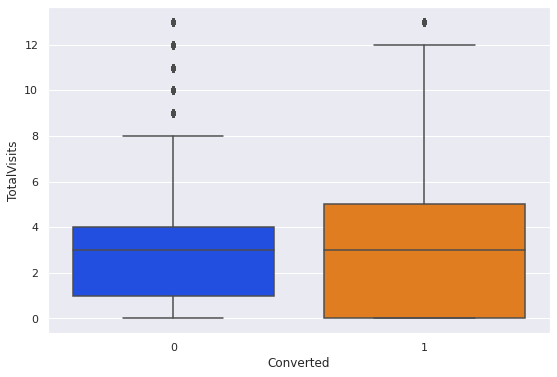

In [507]:
# after removing outliers

plt.figure(figsize = (9, 6))
ax = sns.boxplot(y = "TotalVisits", x = "Converted", data = lead_data)
plt.show()

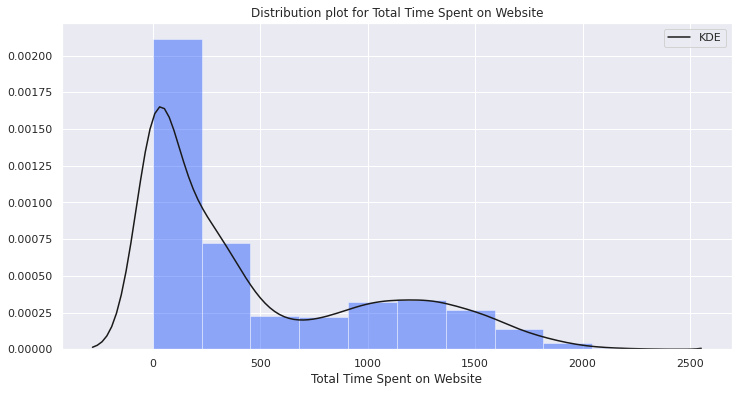

In [508]:
# Total Time Spent on Website
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(lead_data["Total Time Spent on Website"], kde=True, bins = 10, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.title("Distribution plot for Total Time Spent on Website")
plt.xlabel("Total Time Spent on Website")
plt.show()

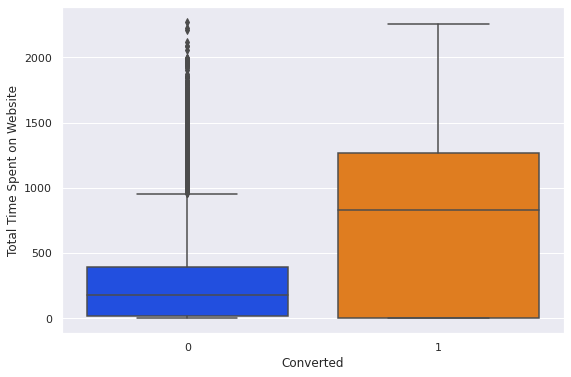

In [509]:

plt.figure(figsize = (9, 6))
ax = sns.boxplot(y = "Total Time Spent on Website", x = "Converted", data = lead_data)
plt.show()

In [510]:
# People who convert spend more "Total Time" on the website

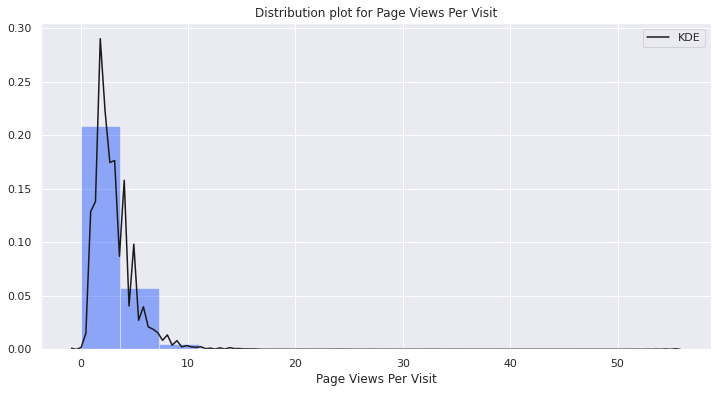

In [511]:
# Page Views Per Visit
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(lead_data["Page Views Per Visit"], kde=True, bins = 15, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.title("Distribution plot for Page Views Per Visit")
plt.xlabel("Page Views Per Visit")
plt.show()

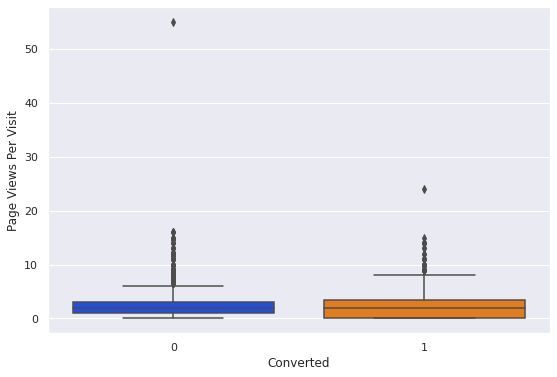

In [512]:
# boxplot
plt.figure(figsize = (9, 6))
ax = sns.boxplot(y = "Page Views Per Visit", x = "Converted", data = lead_data)
plt.show()

In [513]:
# remove outliers

bound = lead_data['Page Views Per Visit'].quantile([0.02,0.98]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= bound[0]] = bound[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= bound[1]] = bound[1]

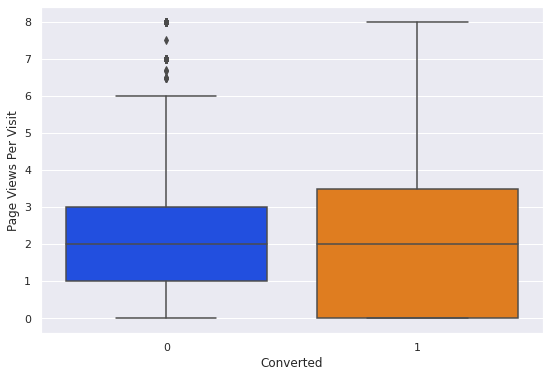

In [514]:
# only 2% of start and end outliers have been removed

plt.figure(figsize = (9, 6))
ax = sns.boxplot(y = "Page Views Per Visit", x = "Converted", data = lead_data)
plt.show()

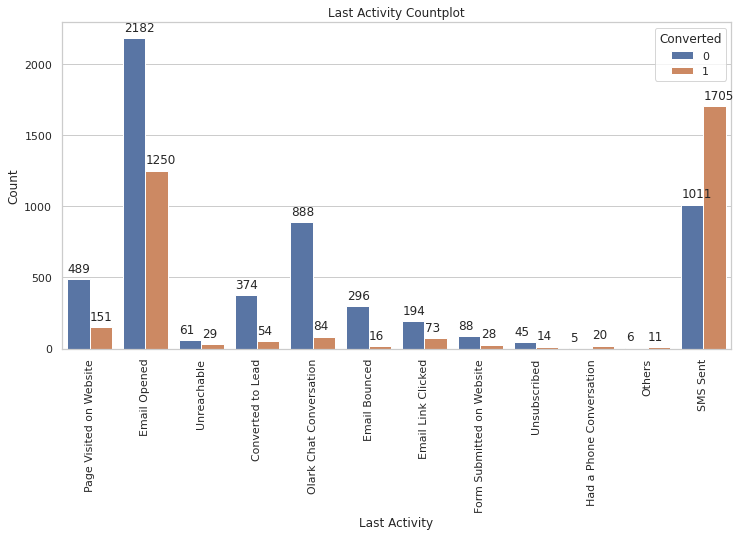

In [515]:
# "Last Activity"

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.title("Last Activity Countplot")
plt.xlabel("Last Activity")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))

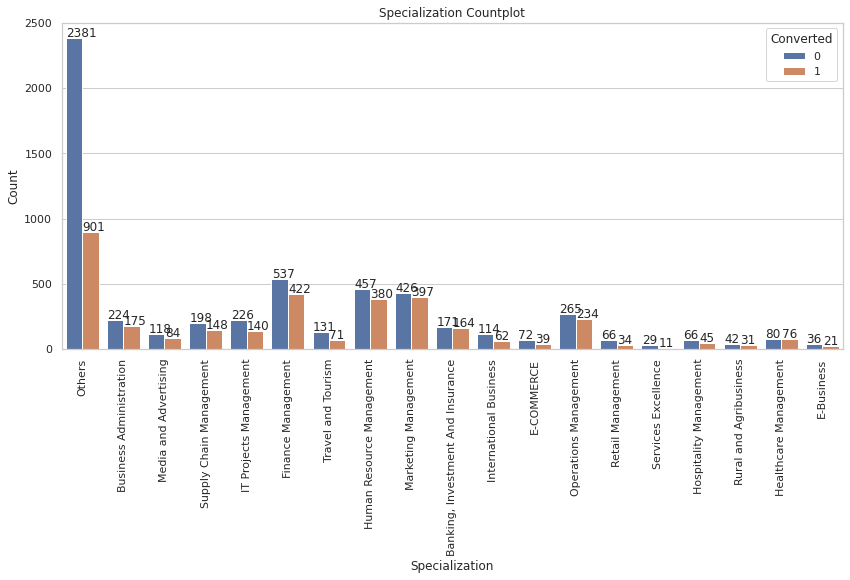

In [516]:
# "Specialization"

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (14, 6))
ax = sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.title("Specialization Countplot")
plt.xlabel("Specialization")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

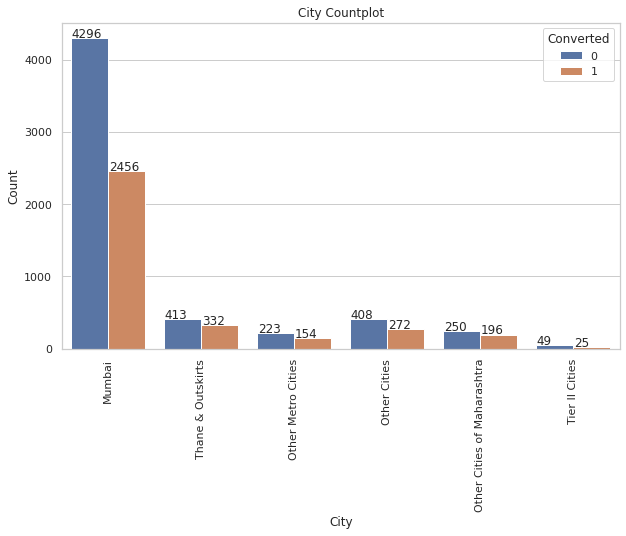

In [517]:
# "City"

sns.set(style = "whitegrid")
sns.color_palette("husl", 8)

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "City", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.title("City Countplot")
plt.xlabel("City")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

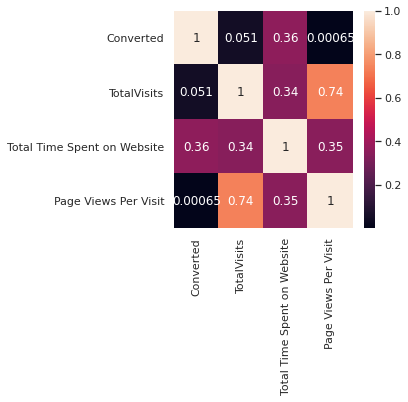

In [518]:
# Heatmap
plt.figure(figsize = (4, 4))
sns.heatmap(lead_data.corr(), annot = True)
plt.show()

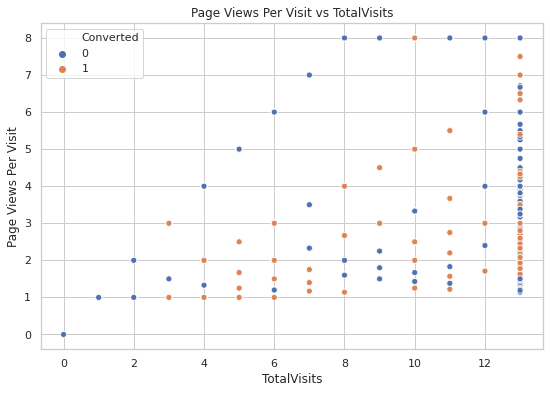

In [519]:
# "TotalVisits" and "Page Views Per Visit" has slightly high correlation

plt.figure(figsize = (9, 6))
ax = sns.scatterplot(x="TotalVisits", y="Page Views Per Visit", hue="Converted", data=lead_data)
plt.title("Page Views Per Visit vs TotalVisits")
plt.show()

#### Columns which do not provide a lot of insight are:

1) "Search"

2) "X Education Forums"

3) "Newspaper"

4) "Digital Advertisement"

5) "Through Recommendations"

6) "Do Not Call"

7) "Newspaper Article"


In [520]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [521]:
# dropping above columns

lead_data = lead_data.drop(columns = ["Search", "X Education Forums", "Newspaper", "Digital Advertisement", 
                                      "Through Recommendations", "Do Not Call",
                                      "Newspaper Article"])

In [522]:
lead_data.shape

(9074, 16)

In [523]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [524]:
cols_at_end = ["Converted"]
lead_data = lead_data[[c for c in lead_data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in lead_data]]

In [525]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,API,Olark Chat,No,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,No,Modified,0
1,API,Organic Search,No,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified,0
4,Landing Page Submission,Google,No,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified,1


In [526]:
# Data Preparation

In [527]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# find all binary categorical columns

binary_columns = lead_data.nunique()[lead_data.nunique() == 2].index.to_list()

le = LabelEncoder()

for column in binary_columns:
  lead_data[column] = le.fit_transform(lead_data[column])

In [528]:
lead_data.nunique()[lead_data.nunique() == 2].index.to_list()

['Do Not Email',
 'What matters most to you in choosing a course',
 'A free copy of Mastering The Interview',
 'Converted']

In [529]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,0,Interested in other courses,Mumbai,0,Modified,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,0,Ringing,Mumbai,0,Email Opened,0
2,Landing Page Submission,Direct Traffic,0,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,Will revert after reading the email,Mumbai,1,Email Opened,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,Ringing,Mumbai,0,Modified,0
4,Landing Page Submission,Google,0,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,0,Will revert after reading the email,Mumbai,0,Modified,1


In [530]:
lead_data.isna().sum()
# no null is present

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
City                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
Converted                                        0
dtype: int64

In [531]:
lead_data.nunique()

Lead Origin                                         4
Lead Source                                         9
Do Not Email                                        2
TotalVisits                                        14
Total Time Spent on Website                      1717
Page Views Per Visit                               98
Last Activity                                      12
Country                                             8
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       2
Tags                                               17
City                                                6
A free copy of Mastering The Interview              2
Last Notable Activity                              10
Converted                                           2
dtype: int64

In [532]:
# One Hot Encoding (Categrical Data)

cat_columns = lead_data.nunique()[lead_data.nunique() < 20][lead_data.nunique() > 2].index.to_list()
cat_columns.remove("TotalVisits")
cat_columns

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

In [533]:
lead_data = pd.get_dummies(data = lead_data, columns = cat_columns, drop_first = True)
lead_data.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,A free copy of Mastering The Interview,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_India,Country_Others,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [534]:
lead_data.shape

(9074, 89)

In [535]:
# find highest correlation values in the dataframe

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [536]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(lead_data, 10))

Top Absolute Correlations
What matters most to you in choosing a course  What is your current occupation_Others        0.990513
Lead Origin_Lead Import                        Lead Source_Facebook                          0.983684
Last Activity_Unsubscribed                     Last Notable Activity_Unsubscribed            0.872656
Lead Origin_Lead Add Form                      Lead Source_Reference                         0.866191
Last Activity_Email Opened                     Last Notable Activity_Email Opened            0.861636
Last Activity_SMS Sent                         Last Notable Activity_SMS Sent                0.853102
What is your current occupation_Others         What is your current occupation_Unemployed    0.802505
What matters most to you in choosing a course  What is your current occupation_Unemployed    0.802298
Last Activity_Email Link Clicked               Last Notable Activity_Email Link Clicked      0.800686
Lead Origin_Landing Page Submission            Specializ

In [537]:
# drop columns for high correlation values ( > 8)

lead_data = lead_data.drop(columns = ["What is your current occupation_Others", "Lead Source_Facebook"])

In [538]:
# spilt data in train and test
from sklearn.model_selection import train_test_split

X = lead_data.drop(columns = ["Converted"]).values
y = lead_data["Converted"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

In [539]:
# get index of Numberic Columns
print(lead_data.columns.get_loc("TotalVisits"))
print(lead_data.columns.get_loc("Total Time Spent on Website"))
print(lead_data.columns.get_loc("Page Views Per Visit"))

1
2
3


In [540]:
X_train[: , [1, 2, 3]]

array([[   3. ,  441. ,    3. ],
       [   2. ,  262. ,    2. ],
       [   2. , 1054. ,    2. ],
       ...,
       [   3. ,  951. ,    1.5],
       [   0. ,    0. ,    0. ],
       [   4. ,  320. ,    4. ]])

In [541]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[: , [2, 3, 4]] = sc.fit_transform(X_train[: , [2, 3, 4]])
X_test[: , [2, 3, 4]] = sc.transform(X_test[: , [2, 3, 4]])


In [542]:
X_train[: , [1, 2, 3]]

array([[ 3.        , -0.08184576,  0.34942708],
       [ 2.        , -0.40817727, -0.16564955],
       [ 2.        ,  1.03570293, -0.16564955],
       ...,
       [ 3.        ,  0.84792558, -0.42318787],
       [ 0.        , -0.8858245 , -1.19580281],
       [ 4.        , -0.30243856,  0.8645037 ]])

In [543]:
# Data Modelling : Logistic Regression

In [544]:
# statsmodel.GLM is used to optimization the outcomes of the model

In [545]:
# Logistic Regression parameters using all features

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  

log_reg_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6718
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1706.8
Date:                Fri, 17 Jul 2020   Deviance:                       3413.6
Time:                        06:33:12   Pearson chi2:                 1.03e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9483      1.574     -1.238      0.216      -5.034       1.137
x1            -1.2749      0.284     -4.483      0.000      -1.832      -0.717
x2             0.1083      0.023      4.765      0.000       0.064       0.153
x3             1.1208      0.052     21.545      0.000       1.019       1.223
x4            -0.3052      0.077     -3.970      0.000      -0.456      -0.155
x5            -1.6426      0.394     -4.170      0.000      -2.415      -0.871
x6            -0.0921      0.142     -0.651      0.515      -0.369       0.185
x7            -0.5455      0.179     -3.054      0.002      -0.896      -0.195
x8             2.0602      1.809      1.139      0.255      -1.486       5.607
x9             0.9216      0.740      1.245      0.213      -0.529       2.372
x10            0.1873      0.150      1.251      0.211      -0.106       0.481
x11            1.0222      0.210      4.865      0.000       0.610       1.434
x12            0.2089      0.169      1.233      0.217      -0.123       0.541
x13           -0.0830      1.102     -0.075      0.940      -2.243       2.077
x14            0.0438      1.824      0.024      0.981      -3.532       3.620
x15            0.4062      0.398      1.019      0.308      -0.375       1.187
x16            4.0237      1.963      2.050      0.040       0.177       7.870
x17            0.0552      0.621      0.089      0.929      -1.163       1.273
x18            0.8009      0.506      1.582      0.114      -0.192       1.794
x19            0.5739      0.294      1.950      0.051      -0.003       1.151
x20           -0.0187      0.472     -0.040      0.968      -0.944       0.907
x21            1.5396      1.029      1.496      0.135      -0.478       3.557
x22           -0.7645      0.326     -2.347      0.019      -1.403      -0.126
x23            1.4511      1.080      1.343      0.179      -0.667       3.569
x24           -0.0642      0.363     -0.177      0.860      -0.776       0.647
x25            1.3069      0.296      4.419      0.000       0.727       1.886
x26            0.4788      0.724      0.661      0.508      -0.940       1.898
x27            1.9205      1.519      1.265      0.206      -1.056       4.897
x28            0.7214      1.163      0.620      0.535      -1.558       3.001
x29            0.2752      1.254      0.219      0.826      -2.183       2.733
x30           -1.1328      1.700     -0.666      0.505      -4.466       2.200
x31            1.0883      1.388      0.784      0.433      -1.632       3.809
x32            1.1864      1.283      0.925      0.355      -1.327       3.700
x33            1.0026      1.702      0.589      0.556      -2.334       4.339
x34            1.2455      1.274      0.978      0.328      -1.251       3.742
x35           -0.2403      0.322     -0.745      0.456      -0.872       0.392
x3

In [556]:
# Selecting Top 25 feature columns

from sklearn.feature_selection import RFE

logreg = LogisticRegression()

rfe = RFE(logreg, 25)
rfe= rfe.fit(X_train,y_train)


In [557]:
rfe.support_

array([ True, False,  True, False,  True, False, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False])

In [558]:
col_train = lead_data.columns.to_list()
col_train.remove("Converted")

lead_data_train = pd.DataFrame(X_train, columns = col_train)

In [559]:
lead_data_train.shape

(6805, 86)

In [560]:
# Ranking and Support basef on RFE

list(zip(lead_data_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('What matters most to you in choosing a course', True, 1),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 42),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 62),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', Tru

In [561]:
# RFE stored columns stored here

cols = lead_data_train.columns[rfe.support_]  
cols  

Index(['Do Not Email', 'Total Time Spent on Website',
       'What matters most to you in choosing a course',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Country_Saudi Arabia',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [562]:
# unused columns displayed

lead_data_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Country_India', 'Country_Others',
       'Country_Singapore', 'Country_United Arab Emirates',
       'Country_United Kingdom', 'Country_United States',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management'

In [563]:
rfe_cols = cols

In [564]:
lead_data_train[rfe_cols].shape

(6805, 25)

In [565]:
len(y_train)

6805

In [566]:
lead_data_train.shape

(6805, 86)

In [567]:
# Assessing the model : Model 1

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6779
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1756.0
Date:                Fri, 17 Jul 2020   Deviance:                       3512.0
Time:                        06:40:52   Pearson chi2:                 1.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7574      0.195     -9.019      0.000      -2.139      -1.375
Do Not Email                                     -1.3097      0.217     -6.044      0.000      -1.734      -0.885
Total Time Spent on Website                       1.1199      0.050     22.178      0.000       1.021       1.219
What matters most to you in choosing a course    -1.6460      0.112    -14.741      0.000      -1.865      -1.427
Lead Origin_Lead Add Form                         2.4341      0.262      9.293      0.000       1.921       2.947
Lead Origin_Lead Import                           1.1436      0.706      1.619      0.106      -0.241       2.528
Lead Source_Olark Chat                            1.1909      0.132      9.021      0.000       0.932       1.450
Lead Source_Welingak Website                      3.8548      0.802      4.807      0.000       2.283       5.427
Last Activity_Had a Phone Conversation            1.2624      1.074      1.175      0.240      -0.844       3.368
Last Activity_Olark Chat Conversation            -1.1051      0.199     -5.547      0.000      -1.496      -0.715
Last Activity_Others                              1.2621      1.066      1.184      0.236      -0.827       3.351
Last Activity_SMS Sent                            0.9261      0.191      4.860      0.000       0.553       1.300
Country_Saudi Arabia                             -2.2341      1.236     -1.807      0.071      -4.657       0.189
What is your current occupation_Student          -1.7628      0.390     -4.522      0.000      -2.527      -0.999
What is your current occupation_Unemployed       -1.3973      0.235     -5.946      0.000      -1.858      -0.937
Tags_Busy                                         1.3537      0.206      6.580      0.000       0.950       1.757
Tags_Closed by Horizzon                           3.5619      0.202     17.623      0.000       3.166       3.958
Tags_Lost to EINS                                 4.1777      0.241     17.348      0.000       3.706       4.650
Tags_Ringing                                     -1.0454      0.149     -7.002      0.000      -1.338      -0.753
Tags_Will revert after reading the email          3.0569      0.122     25.092      0.000       2.818       3.296
Tags_switched off                                -0.8592      0.252     -3.411      0.001      -1.353      -0.365
Tags_wrong number given                          -0.7541      0.555     -1.359      0.174      -1.842       0.334
Last Notable Activity_Modified                   -0.7648      0.121     -6.341      0.000      -1.001      -0.528
Last Notable Activity_Others                      1.8991      1.469      1.293      0.196      -0.980       4.779
Last 

In [568]:
# dropping column with high p value :

rfe_cols = rfe_cols.drop("Last Activity_Had a Phone Conversation")

In [569]:
# Assessing the model : Model 2

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6780
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1756.7
Date:                Fri, 17 Jul 2020   Deviance:                       3513.4
Time:                        06:45:55   Pearson chi2:                 1.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7587      0.195     -9.030      0.000      -2.140      -1.377
Do Not Email                                     -1.3133      0.217     -6.060      0.000      -1.738      -0.888
Total Time Spent on Website                       1.1204      0.050     22.193      0.000       1.021       1.219
What matters most to you in choosing a course    -1.6463      0.112    -14.756      0.000      -1.865      -1.428
Lead Origin_Lead Add Form                         2.4352      0.262      9.298      0.000       1.922       2.949
Lead Origin_Lead Import                           1.1421      0.706      1.617      0.106      -0.243       2.527
Lead Source_Olark Chat                            1.1898      0.132      9.014      0.000       0.931       1.449
Lead Source_Welingak Website                      3.8552      0.802      4.807      0.000       2.283       5.427
Last Activity_Olark Chat Conversation            -1.1137      0.199     -5.594      0.000      -1.504      -0.723
Last Activity_Others                              1.0230      1.053      0.972      0.331      -1.040       3.086
Last Activity_SMS Sent                            0.9139      0.190      4.805      0.000       0.541       1.287
Country_Saudi Arabia                             -2.2478      1.246     -1.804      0.071      -4.690       0.194
What is your current occupation_Student          -1.7650      0.390     -4.528      0.000      -2.529      -1.001
What is your current occupation_Unemployed       -1.3975      0.235     -5.952      0.000      -1.858      -0.937
Tags_Busy                                         1.3541      0.206      6.582      0.000       0.951       1.757
Tags_Closed by Horizzon                           3.5643      0.202     17.641      0.000       3.168       3.960
Tags_Lost to EINS                                 4.1745      0.241     17.332      0.000       3.702       4.647
Tags_Ringing                                     -1.0440      0.149     -6.992      0.000      -1.337      -0.751
Tags_Will revert after reading the email          3.0607      0.122     25.132      0.000       2.822       3.299
Tags_switched off                                -0.8582      0.252     -3.407      0.001      -1.352      -0.365
Tags_wrong number given                          -0.7503      0.555     -1.351      0.177      -1.839       0.338
Last Notable Activity_Modified                   -0.7529      0.120     -6.269      0.000      -0.988      -0.518
Last Notable Activity_Others                      2.7512      1.250      2.201      0.028       0.302       5.201
Last Notable Activity_SMS Sent                    0.9809      0.219      4.476      0.000       0.551       1.410
Last 

In [570]:
# dropping column with high p value :

rfe_cols = rfe_cols.drop("Last Activity_Others")

In [571]:
# Assessing the model parameters : Model 3

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logreg3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6781
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1757.2
Date:                Fri, 17 Jul 2020   Deviance:                       3514.4
Time:                        06:48:16   Pearson chi2:                 1.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7599      0.195     -9.041      0.000      -2.141      -1.378
Do Not Email                                     -1.3147      0.217     -6.069      0.000      -1.739      -0.890
Total Time Spent on Website                       1.1206      0.050     22.196      0.000       1.022       1.220
What matters most to you in choosing a course    -1.6463      0.112    -14.763      0.000      -1.865      -1.428
Lead Origin_Lead Add Form                         2.4328      0.262      9.288      0.000       1.919       2.946
Lead Origin_Lead Import                           1.1420      0.706      1.617      0.106      -0.242       2.526
Lead Source_Olark Chat                            1.1933      0.132      9.050      0.000       0.935       1.452
Lead Source_Welingak Website                      3.8581      0.802      4.810      0.000       2.286       5.430
Last Activity_Olark Chat Conversation            -1.1207      0.199     -5.634      0.000      -1.511      -0.731
Last Activity_SMS Sent                            0.9069      0.190      4.772      0.000       0.534       1.279
Country_Saudi Arabia                             -2.2355      1.236     -1.809      0.070      -4.658       0.187
What is your current occupation_Student          -1.7649      0.390     -4.530      0.000      -2.528      -1.001
What is your current occupation_Unemployed       -1.3958      0.235     -5.948      0.000      -1.856      -0.936
Tags_Busy                                         1.3526      0.206      6.575      0.000       0.949       1.756
Tags_Closed by Horizzon                           3.5740      0.202     17.731      0.000       3.179       3.969
Tags_Lost to EINS                                 4.1725      0.241     17.328      0.000       3.701       4.644
Tags_Ringing                                     -1.0454      0.149     -7.002      0.000      -1.338      -0.753
Tags_Will revert after reading the email          3.0593      0.122     25.127      0.000       2.821       3.298
Tags_switched off                                -0.8593      0.252     -3.412      0.001      -1.353      -0.366
Tags_wrong number given                          -0.7444      0.556     -1.339      0.181      -1.834       0.345
Last Notable Activity_Modified                   -0.7454      0.120     -6.223      0.000      -0.980      -0.511
Last Notable Activity_Others                      3.1623      1.213      2.606      0.009       0.784       5.540
Last Notable Activity_SMS Sent                    0.9883      0.219      4.513      0.000       0.559       1.418
Last Notable Activity_Unreachable                 1.0509      0.623      1.688      0.091      -0.169       2.271
=====

In [572]:
# dropping column with high p value :

rfe_cols = rfe_cols.drop("Tags_wrong number given")

In [573]:
# Assessing the model parameters : Model 4

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logreg4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6782
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1758.2
Date:                Fri, 17 Jul 2020   Deviance:                       3516.4
Time:                        06:49:57   Pearson chi2:                 1.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7790      0.195     -9.144      0.000      -2.160      -1.398
Do Not Email                                     -1.3300      0.216     -6.167      0.000      -1.753      -0.907
Total Time Spent on Website                       1.1216      0.050     22.224      0.000       1.023       1.221
What matters most to you in choosing a course    -1.6482      0.112    -14.761      0.000      -1.867      -1.429
Lead Origin_Lead Add Form                         2.4383      0.262      9.305      0.000       1.925       2.952
Lead Origin_Lead Import                           1.1350      0.702      1.616      0.106      -0.241       2.511
Lead Source_Olark Chat                            1.2003      0.132      9.107      0.000       0.942       1.459
Lead Source_Welingak Website                      3.8661      0.802      4.821      0.000       2.294       5.438
Last Activity_Olark Chat Conversation            -1.1249      0.199     -5.653      0.000      -1.515      -0.735
Last Activity_SMS Sent                            0.9031      0.190      4.753      0.000       0.531       1.276
Country_Saudi Arabia                             -2.2392      1.236     -1.812      0.070      -4.661       0.183
What is your current occupation_Student          -1.7611      0.391     -4.509      0.000      -2.527      -0.996
What is your current occupation_Unemployed       -1.4016      0.235     -5.964      0.000      -1.862      -0.941
Tags_Busy                                         1.3801      0.205      6.737      0.000       0.979       1.782
Tags_Closed by Horizzon                           3.5946      0.201     17.863      0.000       3.200       3.989
Tags_Lost to EINS                                 4.1928      0.241     17.433      0.000       3.721       4.664
Tags_Ringing                                     -1.0155      0.148     -6.869      0.000      -1.305      -0.726
Tags_Will revert after reading the email          3.0821      0.121     25.483      0.000       2.845       3.319
Tags_switched off                                -0.8282      0.251     -3.301      0.001      -1.320      -0.337
Last Notable Activity_Modified                   -0.7416      0.120     -6.188      0.000      -0.976      -0.507
Last Notable Activity_Others                      3.1794      1.215      2.616      0.009       0.797       5.562
Last Notable Activity_SMS Sent                    0.9792      0.219      4.476      0.000       0.550       1.408
Last Notable Activity_Unreachable                 1.0515      0.623      1.687      0.092      -0.170       2.273
=================================================================================================================
"""

In [574]:
# dropping column with high p value :

rfe_cols = rfe_cols.drop("Lead Origin_Lead Import")

In [575]:
# Assessing the model parameters : Model 5

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logreg5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6783
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1759.5
Date:                Fri, 17 Jul 2020   Deviance:                       3519.0
Time:                        06:52:18   Pearson chi2:                 1.00e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7659      0.194     -9.102      0.000      -2.146      -1.386
Do Not Email                                     -1.3337      0.216     -6.187      0.000      -1.756      -0.911
Total Time Spent on Website                       1.1146      0.050     22.194      0.000       1.016       1.213
What matters most to you in choosing a course    -1.6532      0.111    -14.829      0.000      -1.872      -1.435
Lead Origin_Lead Add Form                         2.4213      0.262      9.247      0.000       1.908       2.935
Lead Source_Olark Chat                            1.1868      0.131      9.029      0.000       0.929       1.444
Lead Source_Welingak Website                      3.8658      0.802      4.821      0.000       2.294       5.437
Last Activity_Olark Chat Conversation            -1.1241      0.199     -5.649      0.000      -1.514      -0.734
Last Activity_SMS Sent                            0.9181      0.190      4.842      0.000       0.547       1.290
Country_Saudi Arabia                             -2.2432      1.238     -1.812      0.070      -4.670       0.183
What is your current occupation_Student          -1.7710      0.390     -4.538      0.000      -2.536      -1.006
What is your current occupation_Unemployed       -1.4052      0.235     -5.989      0.000      -1.865      -0.945
Tags_Busy                                         1.3734      0.205      6.710      0.000       0.972       1.775
Tags_Closed by Horizzon                           3.5896      0.201     17.847      0.000       3.195       3.984
Tags_Lost to EINS                                 4.1898      0.240     17.423      0.000       3.719       4.661
Tags_Ringing                                     -1.0175      0.148     -6.884      0.000      -1.307      -0.728
Tags_Will revert after reading the email          3.0841      0.121     25.504      0.000       2.847       3.321
Tags_switched off                                -0.8310      0.251     -3.313      0.001      -1.323      -0.339
Last Notable Activity_Modified                   -0.7460      0.120     -6.228      0.000      -0.981      -0.511
Last Notable Activity_Others                      3.1643      1.215      2.605      0.009       0.783       5.545
Last Notable Activity_SMS Sent                    0.9593      0.218      4.395      0.000       0.532       1.387
Last Notable Activity_Unreachable                 1.0421      0.624      1.671      0.095      -0.180       2.264
=================================================================================================================
"""

In [576]:
# dropping column with high p value :

rfe_cols = rfe_cols.drop("Last Notable Activity_Unreachable")

In [577]:
# Assessing the model parameters : Model 6

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logreg6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6784
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1761.0
Date:                Fri, 17 Jul 2020   Deviance:                       3522.0
Time:                        06:53:33   Pearson chi2:                 1.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7535      0.194     -9.054      0.000      -2.133      -1.374
Do Not Email                                     -1.3375      0.216     -6.204      0.000      -1.760      -0.915
Total Time Spent on Website                       1.1123      0.050     22.171      0.000       1.014       1.211
What matters most to you in choosing a course    -1.6544      0.111    -14.852      0.000      -1.873      -1.436
Lead Origin_Lead Add Form                         2.4187      0.262      9.244      0.000       1.906       2.932
Lead Source_Olark Chat                            1.1817      0.131      8.997      0.000       0.924       1.439
Lead Source_Welingak Website                      3.8630      0.802      4.817      0.000       2.291       5.435
Last Activity_Olark Chat Conversation            -1.1275      0.199     -5.666      0.000      -1.518      -0.738
Last Activity_SMS Sent                            0.9165      0.190      4.833      0.000       0.545       1.288
Country_Saudi Arabia                             -2.2505      1.241     -1.814      0.070      -4.682       0.181
What is your current occupation_Student          -1.7823      0.390     -4.565      0.000      -2.547      -1.017
What is your current occupation_Unemployed       -1.4072      0.234     -6.004      0.000      -1.867      -0.948
Tags_Busy                                         1.3853      0.205      6.765      0.000       0.984       1.787
Tags_Closed by Horizzon                           3.5904      0.201     17.862      0.000       3.196       3.984
Tags_Lost to EINS                                 4.1896      0.241     17.418      0.000       3.718       4.661
Tags_Ringing                                     -1.0183      0.148     -6.894      0.000      -1.308      -0.729
Tags_Will revert after reading the email          3.0919      0.121     25.574      0.000       2.855       3.329
Tags_switched off                                -0.8314      0.251     -3.316      0.001      -1.323      -0.340
Last Notable Activity_Modified                   -0.7582      0.120     -6.342      0.000      -0.993      -0.524
Last Notable Activity_Others                      3.1507      1.215      2.593      0.010       0.769       5.532
Last Notable Activity_SMS Sent                    0.9487      0.218      4.348      0.000       0.521       1.376
=================================================================================================================
"""

In [578]:
# dropping column with high p value :

rfe_cols = rfe_cols.drop("Country_Saudi Arabia")

In [579]:
# Assessing the model parameters : Model 7

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res7 = logreg7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6785
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1763.1
Date:                Fri, 17 Jul 2020   Deviance:                       3526.3
Time:                        06:56:33   Pearson chi2:                 1.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7668      0.194     -9.127      0.000      -2.146      -1.387
Do Not Email                                     -1.3352      0.215     -6.200      0.000      -1.757      -0.913
Total Time Spent on Website                       1.1104      0.050     22.178      0.000       1.012       1.208
What matters most to you in choosing a course    -1.6463      0.111    -14.807      0.000      -1.864      -1.428
Lead Origin_Lead Add Form                         2.4220      0.262      9.260      0.000       1.909       2.935
Lead Source_Olark Chat                            1.1816      0.131      9.005      0.000       0.924       1.439
Lead Source_Welingak Website                      3.8581      0.802      4.813      0.000       2.287       5.429
Last Activity_Olark Chat Conversation            -1.1268      0.199     -5.668      0.000      -1.516      -0.737
Last Activity_SMS Sent                            0.9194      0.190      4.850      0.000       0.548       1.291
What is your current occupation_Student          -1.8118      0.389     -4.653      0.000      -2.575      -1.049
What is your current occupation_Unemployed       -1.3892      0.234     -5.937      0.000      -1.848      -0.931
Tags_Busy                                         1.3722      0.204      6.714      0.000       0.972       1.773
Tags_Closed by Horizzon                           3.5921      0.201     17.881      0.000       3.198       3.986
Tags_Lost to EINS                                 4.1912      0.240     17.435      0.000       3.720       4.662
Tags_Ringing                                     -1.0171      0.148     -6.893      0.000      -1.306      -0.728
Tags_Will revert after reading the email          3.0927      0.121     25.594      0.000       2.856       3.330
Tags_switched off                                -0.8518      0.251     -3.389      0.001      -1.344      -0.359
Last Notable Activity_Modified                   -0.7591      0.119     -6.353      0.000      -0.993      -0.525
Last Notable Activity_Others                      3.1273      1.222      2.558      0.011       0.731       5.523
Last Notable Activity_SMS Sent                    0.9421      0.218      4.320      0.000       0.515       1.369
=================================================================================================================
"""

In [188]:
# all p vales are below threshold of 0.05

In [580]:
# Checking the VIF values fot the columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [581]:
vif = pd.DataFrame()
vif['Columns'] = lead_data_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(lead_data_train[rfe_cols].values, i) for i in range(lead_data_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Columns,VIF
18,Last Notable Activity_SMS Sent,6.25
7,Last Activity_SMS Sent,6.11
9,What is your current occupation_Unemployed,4.36
2,What matters most to you in choosing a course,2.50
16,Last Notable Activity_Modified,2.29
14,Tags_Will revert after reading the email,1.98
4,Lead Source_Olark Chat,1.78
3,Lead Origin_Lead Add Form,1.71
6,Last Activity_Olark Chat Conversation,1.62
13,Tags_Ringing,1.59


In [582]:
#dropping variable with high VIF

rfe_cols = rfe_cols.drop('Last Notable Activity_SMS Sent',1)

In [583]:
# Assessing the model parameters : Model 8

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res8 = logreg8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6786
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1772.6
Date:                Fri, 17 Jul 2020   Deviance:                       3545.3
Time:                        07:03:55   Pearson chi2:                 9.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6730      0.192     -8.693      0.000      -2.050      -1.296
Do Not Email                                     -1.3133      0.216     -6.075      0.000      -1.737      -0.890
Total Time Spent on Website                       1.1088      0.050     22.242      0.000       1.011       1.207
What matters most to you in choosing a course    -1.6687      0.111    -14.986      0.000      -1.887      -1.450
Lead Origin_Lead Add Form                         2.4023      0.262      9.175      0.000       1.889       2.915
Lead Source_Olark Chat                            1.1785      0.131      8.998      0.000       0.922       1.435
Lead Source_Welingak Website                      3.7418      0.793      4.717      0.000       2.187       5.297
Last Activity_Olark Chat Conversation            -0.9956      0.197     -5.052      0.000      -1.382      -0.609
Last Activity_SMS Sent                            1.6174      0.100     16.253      0.000       1.422       1.812
What is your current occupation_Student          -1.8494      0.389     -4.757      0.000      -2.611      -1.087
What is your current occupation_Unemployed       -1.4003      0.235     -5.970      0.000      -1.860      -0.941
Tags_Busy                                         1.3684      0.203      6.747      0.000       0.971       1.766
Tags_Closed by Horizzon                           3.5929      0.200     17.955      0.000       3.201       3.985
Tags_Lost to EINS                                 4.1959      0.241     17.387      0.000       3.723       4.669
Tags_Ringing                                     -0.9823      0.146     -6.749      0.000      -1.268      -0.697
Tags_Will revert after reading the email          3.0775      0.120     25.554      0.000       2.841       3.314
Tags_switched off                                -0.8111      0.249     -3.252      0.001      -1.300      -0.322
Last Notable Activity_Modified                   -1.0403      0.102    -10.215      0.000      -1.240      -0.841
Last Notable Activity_Others                      3.0347      1.220      2.487      0.013       0.643       5.427
=================================================================================================================
"""

In [585]:
# cecking VIF values for the columns

In [584]:
vif = pd.DataFrame()
vif['Columns'] = lead_data_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(lead_data_train[rfe_cols].values, i) for i in range(lead_data_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Columns,VIF
9,What is your current occupation_Unemployed,4.29
2,What matters most to you in choosing a course,2.50
14,Tags_Will revert after reading the email,1.95
4,Lead Source_Olark Chat,1.78
16,Last Notable Activity_Modified,1.78
3,Lead Origin_Lead Add Form,1.71
7,Last Activity_SMS Sent,1.61
13,Tags_Ringing,1.58
6,Last Activity_Olark Chat Conversation,1.57
1,Total Time Spent on Website,1.39


In [586]:
#dropping variable with high VIF

rfe_cols = rfe_cols.drop('What is your current occupation_Unemployed',1)

In [587]:
# Assessing the model parameters : Model 9

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res9 = logreg9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6787
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1793.8
Date:                Fri, 17 Jul 2020   Deviance:                       3587.6
Time:                        07:06:17   Pearson chi2:                 1.08e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6357      0.111    -23.786      0.000      -2.853      -2.418
Do Not Email                                     -1.3208      0.213     -6.205      0.000      -1.738      -0.904
Total Time Spent on Website                       1.1082      0.050     22.332      0.000       1.011       1.205
What matters most to you in choosing a course    -1.1001      0.050    -21.968      0.000      -1.198      -1.002
Lead Origin_Lead Add Form                         2.5225      0.259      9.722      0.000       2.014       3.031
Lead Source_Olark Chat                            1.1531      0.131      8.814      0.000       0.897       1.410
Lead Source_Welingak Website                      3.5826      0.794      4.514      0.000       2.027       5.138
Last Activity_Olark Chat Conversation            -1.0036      0.196     -5.125      0.000      -1.387      -0.620
Last Activity_SMS Sent                            1.6088      0.099     16.232      0.000       1.415       1.803
What is your current occupation_Student          -0.6042      0.328     -1.845      0.065      -1.246       0.038
Tags_Busy                                         1.3424      0.203      6.601      0.000       0.944       1.741
Tags_Closed by Horizzon                           3.7088      0.198     18.706      0.000       3.320       4.097
Tags_Lost to EINS                                 4.2643      0.242     17.616      0.000       3.790       4.739
Tags_Ringing                                     -1.0314      0.145     -7.095      0.000      -1.316      -0.746
Tags_Will revert after reading the email          3.2068      0.120     26.815      0.000       2.972       3.441
Tags_switched off                                -0.8367      0.250     -3.349      0.001      -1.326      -0.347
Last Notable Activity_Modified                   -1.0351      0.101    -10.251      0.000      -1.233      -0.837
Last Notable Activity_Others                      2.9523      1.225      2.410      0.016       0.552       5.353
=================================================================================================================
"""

In [588]:
# dropping column with high p value

rfe_cols = rfe_cols.drop("What is your current occupation_Student")

In [589]:
# Assessing the model parameters : Model 10

X_train_sm = sm.add_constant(lead_data_train[rfe_cols])
logreg10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res10 = logreg10.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6788
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1795.5
Date:                Fri, 17 Jul 2020   Deviance:                       3591.1
Time:                        07:07:52   Pearson chi2:                 1.08e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6611      0.110    -24.168      0.000      -2.877      -2.445
Do Not Email                                     -1.3159      0.212     -6.192      0.000      -1.732      -0.899
Total Time Spent on Website                       1.1064      0.050     22.318      0.000       1.009       1.204
What matters most to you in choosing a course    -1.0935      0.050    -21.907      0.000      -1.191      -0.996
Lead Origin_Lead Add Form                         2.5116      0.260      9.662      0.000       2.002       3.021
Lead Source_Olark Chat                            1.1504      0.131      8.806      0.000       0.894       1.406
Lead Source_Welingak Website                      3.5999      0.793      4.538      0.000       2.045       5.155
Last Activity_Olark Chat Conversation            -1.0064      0.196     -5.141      0.000      -1.390      -0.623
Last Activity_SMS Sent                            1.6185      0.099     16.341      0.000       1.424       1.813
Tags_Busy                                         1.3600      0.203      6.692      0.000       0.962       1.758
Tags_Closed by Horizzon                           3.7218      0.198     18.824      0.000       3.334       4.109
Tags_Lost to EINS                                 4.2737      0.242     17.653      0.000       3.799       4.748
Tags_Ringing                                     -1.0076      0.145     -6.957      0.000      -1.292      -0.724
Tags_Will revert after reading the email          3.2155      0.119     26.910      0.000       2.981       3.450
Tags_switched off                                -0.8221      0.250     -3.292      0.001      -1.312      -0.333
Last Notable Activity_Modified                   -1.0277      0.101    -10.195      0.000      -1.225      -0.830
Last Notable Activity_Others                      2.9779      1.226      2.429      0.015       0.575       5.380
=================================================================================================================
"""

In [590]:
# checking VIF values for the columns

vif = pd.DataFrame()
vif['Columns'] = lead_data_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(lead_data_train[rfe_cols].values, i) for i in range(lead_data_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Columns,VIF
4,Lead Source_Olark Chat,1.73
3,Lead Origin_Lead Add Form,1.70
12,Tags_Will revert after reading the email,1.66
6,Last Activity_Olark Chat Conversation,1.57
7,Last Activity_SMS Sent,1.57
14,Last Notable Activity_Modified,1.55
1,Total Time Spent on Website,1.39
5,Lead Source_Welingak Website,1.32
11,Tags_Ringing,1.19
9,Tags_Closed by Horizzon,1.15


In [594]:
# all p values and VIF values are within thresholds ( p value < 0.05 and VIF < 2)

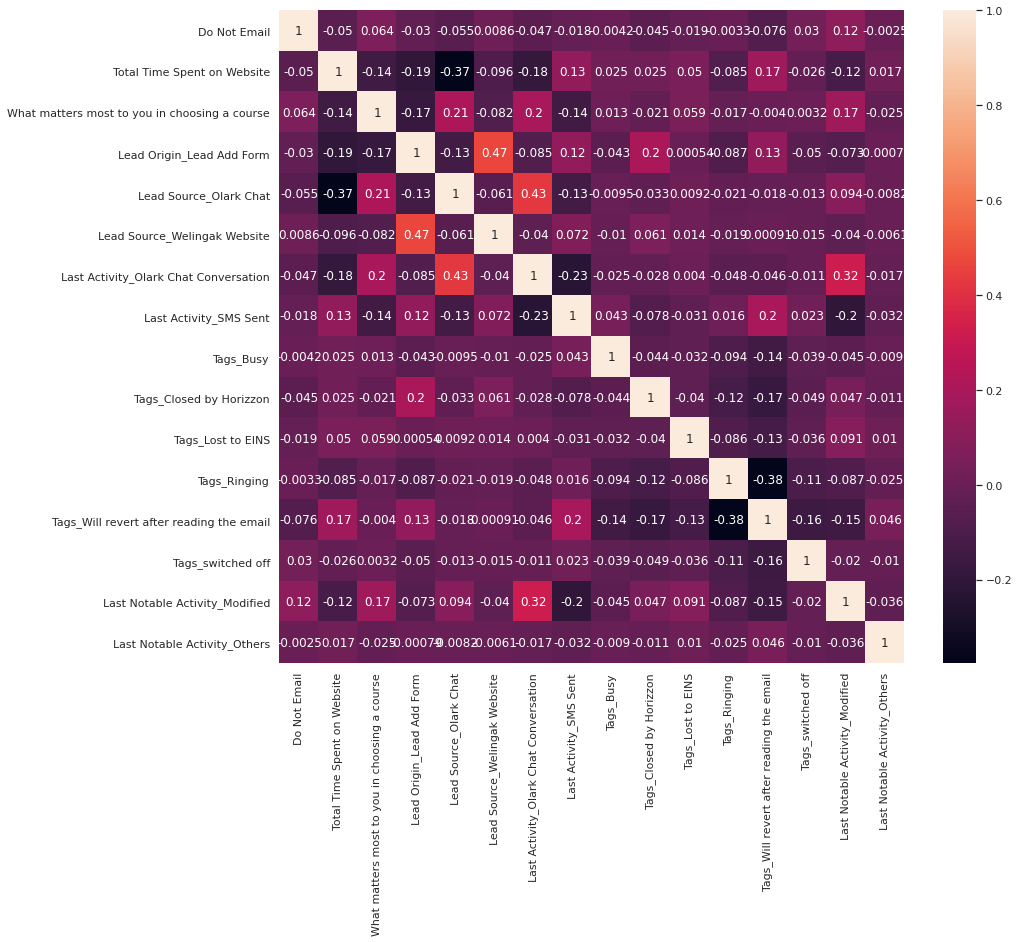

In [592]:
# heatmap for columns present in the model

plt.figure(figsize = (14, 12))
sns.heatmap(lead_data_train[rfe_cols].corr(), annot =True)
plt.show()

In [593]:
# Fit History of the final model
res10.fit_history

{'deviance': [inf,
  3915.353006068737,
  4179.256540358985,
  3680.621705945232,
  3595.7058726848145,
  3591.1300298931255,
  3591.0931899214365,
  3591.0931484089865,
  3591.0931484088333],
 'iteration': 7,
 'params': [inf,
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([-1.70510081, -0.40888057,  0.63314356, -0.54278728,  1.59752647,
          0.59905182,  1.05054097, -0.38293646,  0.81943649,  0.98159631,
          2.3781202 ,  2.66013156, -0.36578651,  2.04878599, -0.34813074,
         -0.47116999,  1.34703392]),
  array([-2.26884289, -0.82858991,  0.89816431, -0.86877221,  2.1315767 ,
          0.91507961,  2.07000022, -0.70583471,  1.24862669,  1.24704195,
          3.15346649,  3.57091824, -0.70809633,  2.71506304, -0.61421137,
         -0.76598309,  2.20898775]),
  array([-2.57707904, -1.1774048 ,  1.05838959, -1.04552455,  2.42518847,
          1.09866209,  2.98626522, -0.93053508,  1.53057546,  1.34059327,
          3.5970779 ,  4.115

In [595]:
# Calculating Feature Importances of the logistic Regression model

In [596]:
coefficients = res10.params
abs_coefficients = [abs(number) for number in coefficients.to_list()]

In [597]:
coefficients.index.to_list()

['const',
 'Do Not Email',
 'Total Time Spent on Website',
 'What matters most to you in choosing a course',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Others']

In [598]:
coef_df = pd.DataFrame(list(zip( coefficients.index.to_list(), coefficients, abs_coefficients)) , columns = ["Feature", "Importance", "Abs Importance"])
coef_df

,Feature,Importance,Abs Importance
0,const,-2.661142,2.661142
1,Do Not Email,-1.315860,1.315860
2,Total Time Spent on Website,1.106360,1.106360
3,What matters most to you in choosing a course,-1.093453,1.093453
4,Lead Origin_Lead Add Form,2.511595,2.511595
5,Lead Source_Olark Chat,1.150368,1.150368
6,Lead Source_Welingak Website,3.599881,3.599881
7,Last Activity_Olark Chat Conversation,-1.006354,1.006354
8,Last Activity_SMS Sent,1.618537,1.618537
9,Tags_Busy,1.360048,1.360048


In [599]:
coef_df.sort_values(by='Abs Importance', ascending=False)

,Feature,Importance,Abs Importance
11,Tags_Lost to EINS,4.273742,4.273742
10,Tags_Closed by Horizzon,3.721751,3.721751
6,Lead Source_Welingak Website,3.599881,3.599881
13,Tags_Will revert after reading the email,3.215529,3.215529
16,Last Notable Activity_Others,2.977916,2.977916
0,const,-2.661142,2.661142
4,Lead Origin_Lead Add Form,2.511595,2.511595
8,Last Activity_SMS Sent,1.618537,1.618537
9,Tags_Busy,1.360048,1.360048
1,Do Not Email,-1.315860,1.315860


In [601]:
# Getting the Predicted values on the training data:

y_train_pred = res10.predict(X_train_sm)
y_train_pred[:10]

0    0.016314
1    0.003630
2    0.140491
3    0.263365
4    0.249706
5    0.935787
6    0.958194
7    0.002016
8    0.005605
9    0.060209
dtype: float64

In [602]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01631389, 0.00363019, 0.14049053, 0.2633645 , 0.24970644,
       0.93578679, 0.95819411, 0.00201561, 0.00560527, 0.06020876])

In [603]:
type(y_train)

numpy.ndarray

In [604]:
y_train_pred_final = pd.DataFrame({'Converted Actual Train ':y_train , 'Converted prob Train':y_train_pred})
y_train_pred_final.head()

,Converted Actual Train,Converted prob Train
0,0,0.016314
1,0,0.003630
2,0,0.140491
3,0,0.263365
4,0,0.249706


In [605]:
y_train_pred_final['Train Predicted'] = y_train_pred_final["Converted prob Train"].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted Actual Train,Converted prob Train,Train Predicted
0,0,0.016314,0
1,0,0.003630,0
2,0,0.140491,0
3,0,0.263365,0
4,0,0.249706,0


In [608]:
y_train_pred_final['Train Predicted'].values

array([0, 0, 0, ..., 1, 0, 0])

In [609]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Training Set : ")
print(confusion_matrix(y_train, y_train_pred_final['Train Predicted'].values))

print()

print("Classification Report for the Training Set : ")
print(classification_report(y_train, y_train_pred_final['Train Predicted'].values))

Confusion Matrix for the Training Set : 
[[3958  268]
 [ 397 2182]]

Classification Report for the Training Set : 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4226
           1       0.89      0.85      0.87      2579

    accuracy                           0.90      6805
   macro avg       0.90      0.89      0.90      6805
weighted avg       0.90      0.90      0.90      6805



In [610]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train, y_train_pred_final['Train Predicted'].values),2))

0.9


In [611]:
from sklearn.metrics import precision_score

print(round(precision_score(y_train, y_train_pred_final['Train Predicted'].values),2))

0.89


In [612]:
from sklearn.metrics import recall_score

print(round(recall_score(y_train, y_train_pred_final['Train Predicted'].values),2))

0.85


In [613]:
# Checking other parameters for the traning set

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_final['Train Predicted'].values)

TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [614]:
# sensitivity of the logistic regression model (Training Set)

TP / float(TP+FN)

0.8460643660333462

In [615]:
# specificity of the logistic regression model (Training Set)

TN / float(TN+FP)

0.9365830572645528

In [624]:
# Plotting the ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

def draw_roc( actual, prob ):
    fpr, tpr, thresholds = roc_curve( actual, prob, drop_intermediate = False )
    auc_score = roc_auc_score( actual, prob )

    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr,  label = 'ROC curve (area = %0.2f)' % auc_score )

    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate or [ (1 - True Negative Rate) ]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')

    plt.legend(loc="lower right")
    plt.show()

    return None


In [625]:
fpr, tpr, thresholds = roc_curve( y_train, y_train_pred_final["Converted prob Train"], drop_intermediate = False )

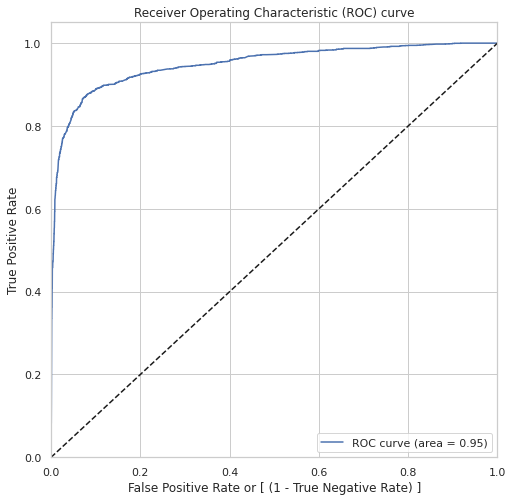

In [626]:
draw_roc(y_train, y_train_pred_final["Converted prob Train"])

In [627]:
# ROC curve area = 0.95 
# Curve area closer to 1 is desired, which is obtained

In [630]:
# Finding Optimul Probability Threshold 

nums = [float(x)/10 for x in range(10)]
for num in nums:
    y_train_pred_final["Prob : "+ str(num)]= y_train_pred_final["Converted prob Train"].map(lambda x: 1 if x > num else 0)

y_train_pred_final = y_train_pred_final.drop(columns = ["Train Predicted"])
y_train_pred_final.head()

,Converted Actual Train,Converted prob Train,Prob : 0.0,Prob : 0.1,Prob : 0.2,Prob : 0.3,Prob : 0.4,Prob : 0.5,Prob : 0.6,Prob : 0.7,Prob : 0.8,Prob : 0.9
0,0,0.016314,1,0,0,0,0,0,0,0,0,0
1,0,0.003630,1,0,0,0,0,0,0,0,0,0
2,0,0.140491,1,1,0,0,0,0,0,0,0,0
3,0,0.263365,1,1,1,0,0,0,0,0,0,0
4,0,0.249706,1,1,1,0,0,0,0,0,0,0


In [631]:
# Calculating the "Accuracy", "Sensitivity" and "Specificity" at different Probability Thresholds

from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame( columns = ['Prob Thres','Accuracy','Sensitivity','Specificity'])

nums = [float(x)/10 for x in range(10)]

for num in nums:
    con_mat = confusion_matrix(y_train, y_train_pred_final["Prob : " + str(num)].values)
    total_val = sum( sum( con_mat ))
    accuracy = (con_mat[0,0]+con_mat[1,1])/total_val
    
    speci = con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])
    sensi = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])

    cutoff_df.loc[num] =[ num ,accuracy,sensi,speci]
    
print(cutoff_df)

     Prob Thres  Accuracy  Sensitivity  Specificity
0.0         0.0  0.378986     1.000000     0.000000
0.1         0.1  0.766348     0.948430     0.655230
0.2         0.2  0.853049     0.920900     0.811642
0.3         0.3  0.885378     0.898410     0.877425
0.4         0.4  0.902278     0.877084     0.917653
0.5         0.5  0.902278     0.846064     0.936583
0.6         0.6  0.901984     0.814269     0.955513
0.7         0.7  0.896106     0.771229     0.972314
0.8         0.8  0.882880     0.720047     0.982253
0.9         0.9  0.838795     0.587437     0.992191


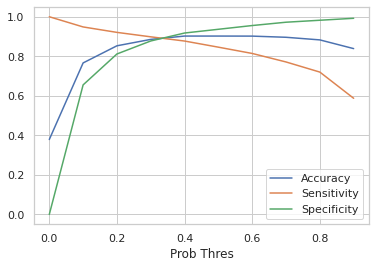

In [637]:
# Plot for Accuracy, Sensitivity and Specificity at different thresholds

cutoff_df.plot.line( x='Prob Thres', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [638]:
# From curve we can see that optimal threshold is above 0.3
# Therefore, we take 0.4 as the optimul cutoff point

In [643]:
# Final predictions for the training set based on threshold as 0.4

y_train_pred_final['Final Predicted Train'] = y_train_pred_final["Converted prob Train"].map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final[['Converted Actual Train ', 'Converted prob Train', 'Final Predicted Train']].head()

,Converted Actual Train,Converted prob Train,Final Predicted Train
0,0,0.016314,0
1,0,0.003630,0
2,0,0.140491,0
3,0,0.263365,0
4,0,0.249706,0


In [644]:
y_train_pred_final.columns

Index(['Converted Actual Train ', 'Converted prob Train', 'Prob : 0.0',
       'Prob : 0.1', 'Prob : 0.2', 'Prob : 0.3', 'Prob : 0.4', 'Prob : 0.5',
       'Prob : 0.6', 'Prob : 0.7', 'Prob : 0.8', 'Prob : 0.9',
       'Final Predicted Train'],
      dtype='object')

In [647]:
# Calculating Rankings for the predictions in the training set

y_train_pred_final['Lead_Score'] = y_train_pred_final["Converted prob Train"].map( lambda x: round(x*100))

y_train_pred_final[['Converted Actual Train ', 'Converted prob Train', 'Final Predicted Train', 'Lead_Score']].head(10)

,Converted Actual Train,Converted prob Train,Final Predicted Train,Lead_Score
0,0,0.016314,0,2
1,0,0.003630,0,0
2,0,0.140491,0,14
3,0,0.263365,0,26
4,0,0.249706,0,25
5,1,0.935787,1,94
6,1,0.958194,1,96
7,0,0.002016,0,0
8,0,0.005605,0,1
9,0,0.060209,0,6


In [ ]:
# Model Train parameters after selecting optimul probability threshold

In [648]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Training Set after selecting optimul probability threshold : ")
print(confusion_matrix(y_train, y_train_pred_final['Final Predicted Train'].values))

print()

print("Classification Report for the Training Set after selecting optimul probability threshold : ")
print(classification_report(y_train, y_train_pred_final['Final Predicted Train'].values))

Confusion Matrix for the Training Set after selecting optimul probability threshold : 
[[3878  348]
 [ 317 2262]]

Classification Report for the Training Set after selecting optimul probability threshold : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4226
           1       0.87      0.88      0.87      2579

    accuracy                           0.90      6805
   macro avg       0.90      0.90      0.90      6805
weighted avg       0.90      0.90      0.90      6805



In [652]:
from sklearn.metrics import accuracy_score

print("Accuracy for Training Set : ")
print(accuracy_score(y_train, y_train_pred_final['Final Predicted Train'].values))

Accuracy for Training Set : 
0.9022777369581191


In [655]:
from sklearn.metrics import precision_score

print("Precision for Training Set : ")
print(precision_score(y_train, y_train_pred_final['Final Predicted Train'].values))

Precision for Training Set : 
0.8666666666666667


In [656]:
from sklearn.metrics import recall_score

print("Recall for Training Set : ")
print(recall_score(y_train, y_train_pred_final['Final Predicted Train'].values))

Recall for Training Set : 
0.8770841411399767


In [657]:
# Checking other parameters for the traning set

confusion_matrix_train = confusion_matrix(y_train, y_train_pred_final['Final Predicted Train'].values)

TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [658]:
# sensitivity of the logistic regression model (Training Set)

TP / float(TP+FN)

0.8770841411399767

In [659]:
# specificity of the logistic regression model (Training Set)

TN / float(TN+FP)

0.9176526265972551

#### Training Data outcomes:

1) Accuracy - 0.92

2) Sensitivity - 0.87

3) Specificity - 0.91

In [661]:
pd.DataFrame(X_test).shape

(2269, 86)

In [660]:
# Outcomes on the Test data:

In [664]:
# Probability outcomes on the Test Data

lead_test_data = pd.DataFrame(X_test, columns = col_train)
X_test_sm = sm.add_constant(lead_test_data[rfe_cols])
y_test_prob_pred = res10.predict(X_test_sm)

In [665]:
y_train_pred_final.columns

Index(['Converted Actual Train ', 'Converted prob Train', 'Prob : 0.0',
       'Prob : 0.1', 'Prob : 0.2', 'Prob : 0.3', 'Prob : 0.4', 'Prob : 0.5',
       'Prob : 0.6', 'Prob : 0.7', 'Prob : 0.8', 'Prob : 0.9',
       'Final Predicted Train', 'Lead_Score'],
      dtype='object')

In [666]:
y_test_pred_final = pd.DataFrame( y_test_prob_pred, columns = ["Converted prob Test"])

In [667]:
y_test_pred_final["Converted Actual Test"] = y_test

In [670]:
y_test_pred_final['Final Predicted Test'] = y_test_pred_final["Converted prob Test"].map(lambda x: 1 if x > 0.4 else 0)
y_test_pred_final['Lead_Score'] = y_test_pred_final["Converted prob Test"].map( lambda x: round(x*100))

In [671]:
y_test_pred_final.head()

,Converted prob Test,Converted Actual Test,Final Predicted Test,Lead_Score
0,0.165548,0,0,17
1,0.503685,0,1,50
2,0.138904,0,0,14
3,0.020110,0,0,2
4,0.129981,0,0,13


In [672]:
# Final Metrics for the Test Set

In [673]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Logistic Regression model on the Test Set : ")
print(confusion_matrix(y_test, y_test_pred_final["Final Predicted Test"].values))

print()

print("Classification Report for the Logistic Regression model on the Test Set: ")
print(classification_report(y_test,  y_test_pred_final["Final Predicted Test"].values))

Confusion Matrix for the Logistic Regression model on the Test Set : 
[[1285  128]
 [ 126  730]]

Classification Report for the Logistic Regression model on the Test Set: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1413
           1       0.85      0.85      0.85       856

    accuracy                           0.89      2269
   macro avg       0.88      0.88      0.88      2269
weighted avg       0.89      0.89      0.89      2269



In [676]:
from sklearn.metrics import accuracy_score

print("Accuracy of the Test Set : (Logistic Regression)")
print(accuracy_score(y_test, y_test_pred_final["Final Predicted Test"].values))

Accuracy of the Test Set : (Logistic Regression)
0.8880564125165271


In [677]:
from sklearn.metrics import precision_score

print("Precision of the Test Set : (Logistic Regression)")
print(precision_score(y_test, y_test_pred_final["Final Predicted Test"].values))

Precision of the Test Set : (Logistic Regression)
0.8508158508158508


In [678]:
from sklearn.metrics import recall_score

print("Recall of the Test Set : (Logistic Regression)")
print(recall_score(y_test, y_test_pred_final["Final Predicted Test"].values))

Recall of the Test Set : (Logistic Regression)
0.852803738317757


In [685]:
# Calculating Specificity and Sensitivity on the Test Set:

con_mat_test = confusion_matrix(y_test,  y_test_pred_final["Final Predicted Test"].values)

TP = con_mat_test[1, 1] # true positive 
TN = con_mat_test[0, 0] # true negatives
FP = con_mat_test[0, 1] # false positives
FN = con_mat_test[1, 0] # false negatives

In [686]:
con_mat_test

array([[1285,  128],
       [ 126,  730]])

In [687]:
# Sensitivity of our logistic regression model on the test set

print("Sensitivity of the Logistic Regression Model on the Test Set")
TP / float(TP+FN)

Sensitivity of the Logistic Regression Model on the Test Set


0.852803738317757

In [688]:
# Specificity of our logistic regression model on the test set

print("Specificity of the Logistic Regression Model on the Test Set")
TN / float(TN+FP)

Specificity of the Logistic Regression Model on the Test Set


0.9094125973106865